# Box plot Stackabuse - Seaborn
- https://stackabuse.com/seaborn-box-plot-tutorial-and-examples/
- A time series dataset is a collection of data that are time-indexed and collected over a period of time.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

### Import & view data (df borned)

In [2]:
df = pd.read_csv('forestfires.csv')
print(df.isnull().values.any())     #  there isn't any missing data
# If there were, we'd have to handle missing DataFrame values.
df

False


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [10]:
### We’ll save these as their own variables for convenience:
# FFMC = df["FFMC"]
# DMC = df["DMC"]
# DC = df["DC"]
# RH = df["RH"]
# ISI = df["ISI"]
# temp = df["temp"]

# DC.info(), DC

# I will NOT USE this simplifications
df['DC'].info(), df['DC']               # it's ok

<class 'pandas.core.series.Series'>
RangeIndex: 517 entries, 0 to 516
Series name: DC
Non-Null Count  Dtype  
--------------  -----  
517 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


(None,
 0       94.3
 1      669.1
 2      686.9
 3       77.5
 4      102.2
        ...  
 512    665.6
 513    665.6
 514    665.6
 515    614.7
 516    106.7
 Name: DC, Length: 517, dtype: float64)

### Plotting a Boxplot in Seaborn
If we want to visualize just the distribution of a categorical variable, we can provide our chosen variable as the x argument. If we do this, Seaborn will calculate the values on the Y-axis automatically, as we can see:

count    517.000000
mean     110.872340
std       64.046482
min        1.100000
25%       68.600000
50%      108.300000
75%      142.400000
max      291.300000
Name: DMC, dtype: float64


<AxesSubplot: xlabel='DMC'>

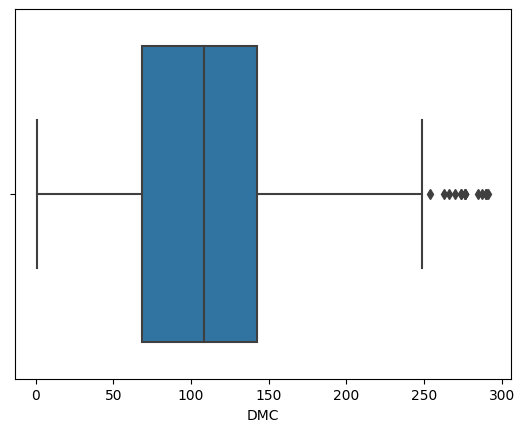

In [8]:
print(df['DMC'].describe())
sns.boxplot(x= df['DMC'])

> However, if there’s a specific distribution that we want to see segmented by type, we can also provide a categorical X-variable and a continuous Y-variable.

<AxesSubplot: xlabel='DMC', ylabel='day'>

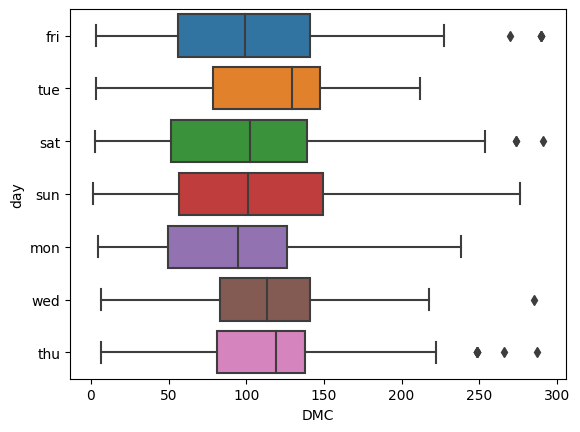

In [9]:
sns.boxplot(x=df.DMC, y=df.day)

If we want to visualize multiple columns at the same time, what do we provide to the x and y arguments? Well, we provide the labels for the data we want, and provide the actual data using the data argument.    
We can create a new DataFrame containing just the data we want to visualize, and melt() it into the data argument, providing labels such as x='variable' and y='value':

In [16]:
df1 = pd.DataFrame(data=df, columns=["FFMC", "DMC", "DC", "ISI"])
display(df1, df1.melt(), pd.melt(df1))    # wide-form to long-form data

,FFMC,DMC,DC,ISI
0,86.2,26.2,94.3,5.1
1,90.6,35.4,669.1,6.7
2,90.6,43.7,686.9,6.7
3,91.7,33.3,77.5,9.0
4,89.3,51.3,102.2,9.6
...,...,...,...,...
512,81.6,56.7,665.6,1.9
513,81.6,56.7,665.6,1.9
514,81.6,56.7,665.6,1.9
515,94.4,146.0,614.7,11.3


,variable,value
0,FFMC,86.2
1,FFMC,90.6
2,FFMC,90.6
3,FFMC,91.7
4,FFMC,89.3
...,...,...
2063,ISI,1.9
2064,ISI,1.9
2065,ISI,1.9
2066,ISI,11.3


,variable,value
0,FFMC,86.2
1,FFMC,90.6
2,FFMC,90.6
3,FFMC,91.7
4,FFMC,89.3
...,...,...
2063,ISI,1.9
2064,ISI,1.9
2065,ISI,1.9
2066,ISI,11.3


<AxesSubplot: xlabel='variable', ylabel='value'>

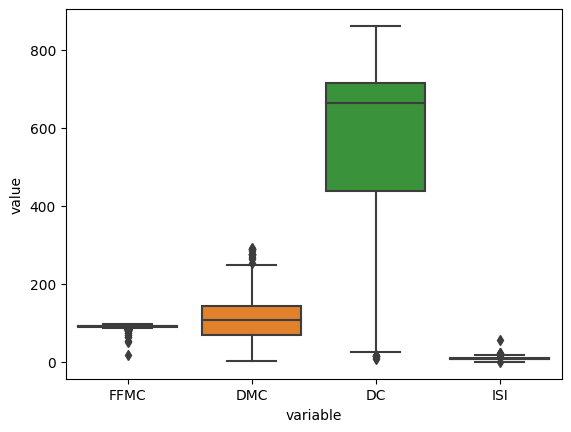

In [17]:
sns.boxplot(x='variable', y='value', data=df1.melt())

### Customize a Seaborn Boxplot

##### Change Boxplot Colors
Seaborn will automatically assign the different colors to different variables so we can easily visually differentiate them. Though, we can also supply a list of colors to be used if we'd like to specify them.

After choosing a list of colors with hex values (or any valid Matplotlib color), we can pass them into the palette argument:

<AxesSubplot: xlabel='DMC', ylabel='day'>

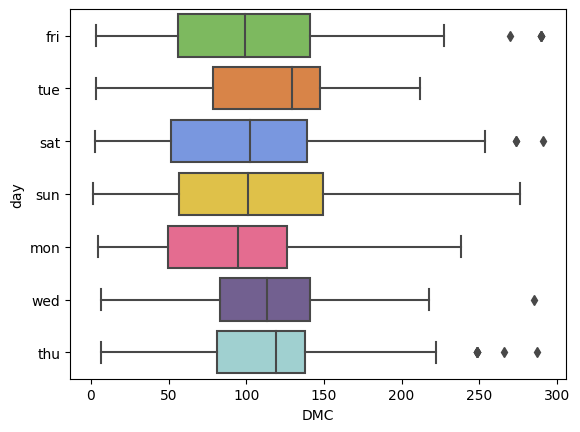

In [19]:
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']
sns.boxplot(x=df['DMC'], y=df['day'], palette=colors)

Text(0.5, 1.0, 'Dist')

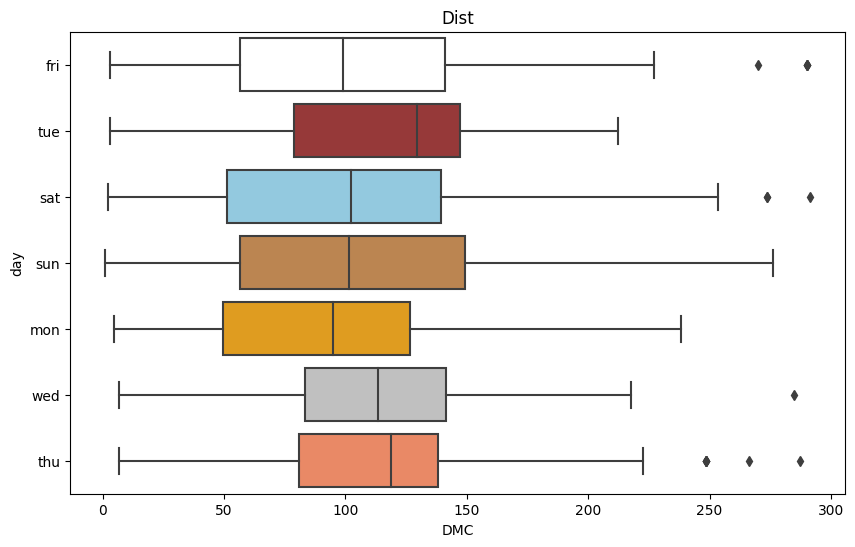

In [24]:
### JM in OOP perspective
fig, axe = plt.subplots(figsize=(10, 6))
lors = ['white', 'brown', 'skyblue', 'peru', 'orange', 'silver', 'coral']
# https://matplotlib.org/stable/gallery/color/named_colors.html
axe = sns.boxplot(x=df['DMC'], y=df['day'], palette=lors)
axe.set_title('Dist')


Text(0, 0.5, 'Values')

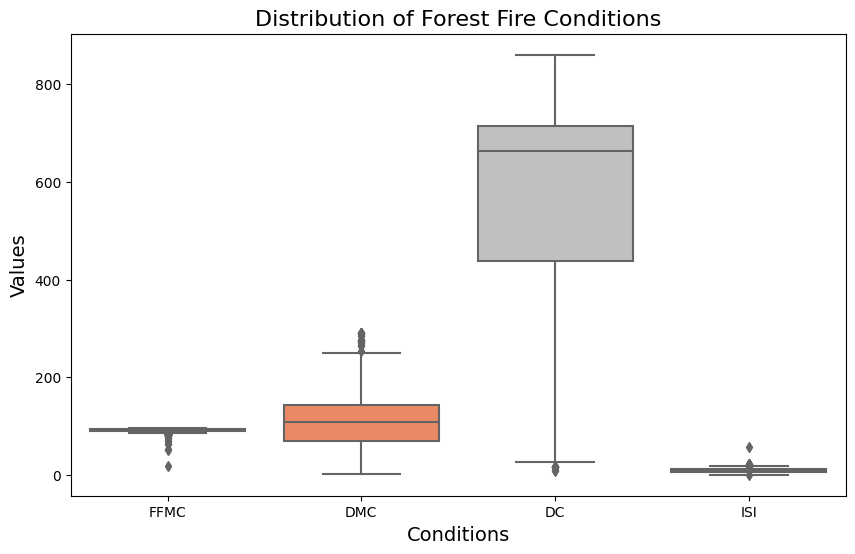

In [30]:
### Title & Axis Labels
fig, axe = plt.subplots(figsize=(10, 6))
colors1 = ['white', 'brown', 'skyblue', 'peru', 'orange', 'silver', 'coral']
colors2 = ['silver', 'coral']
# https://matplotlib.org/stable/gallery/color/named_colors.html
axe = sns.boxplot(x='variable', y='value', data=df1.melt(), palette=colors2)
axe.set_title("Distribution of Forest Fire Conditions", fontsize=16)
axe.set_xlabel("Conditions", fontsize=14)
axe.set_ylabel("Values", fontsize=14)

##### Ordering Boxplots
If we want to view the boxes in a specific order, we can do that by making use of the order argument, and supplying the column names in the order you want to see them in:

Text(0, 0.5, 'Values')

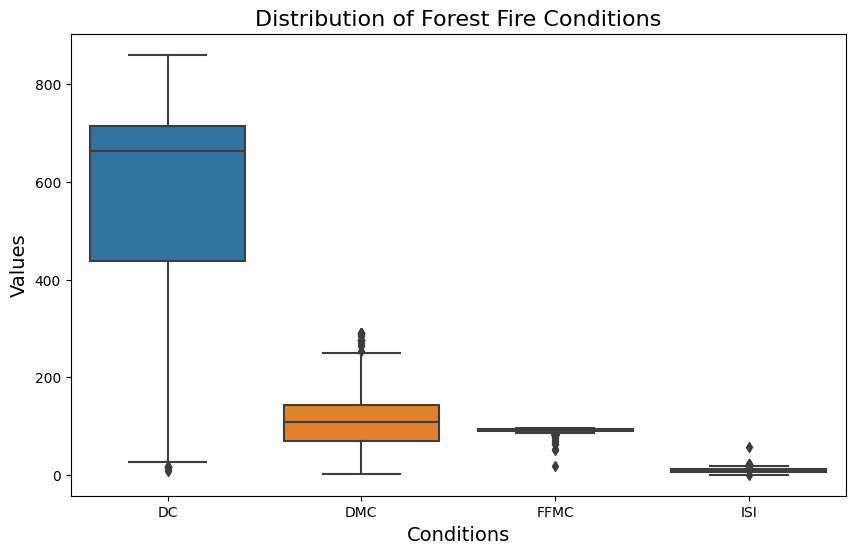

In [33]:
fig, axe = plt.subplots(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=df1.melt(), order=['DC', 'DMC', 'FFMC', 'ISI'], ax=axe)
axe.set_title("Distribution of Forest Fire Conditions", fontsize=16)
axe.set_xlabel("Conditions", fontsize=14)
axe.set_ylabel("Values", fontsize=14)

Text(0, 0.5, 'Values')

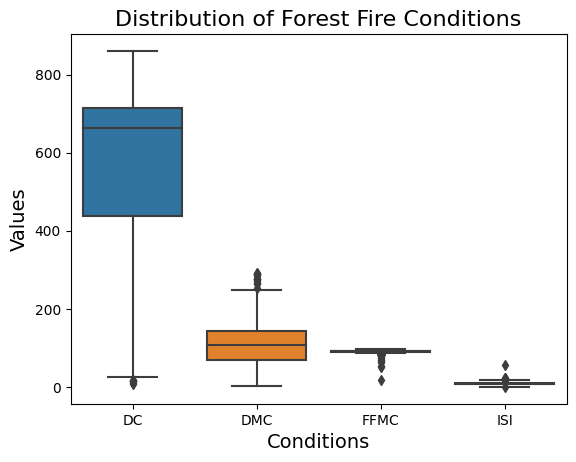

In [40]:
### other objet usage
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df1), order=["DC", "DMC", "FFMC", "ISI"])
boxplot.axes.set_title("Distribution of Forest Fire Conditions", fontsize=16)
boxplot.set_xlabel("Conditions", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)

##### Creating Subplots -A-
If we wanted to separate out the plots for the individual features into their own subplots, we could do that by creating a figure and axes with the subplots function from Matplotlib. Then, we use the axes object and access them via their index. The boxplot() function accepts an ax argument, specifying on which axes it should be plotted on:

Text(0.5, 1.0, 'other TIT')

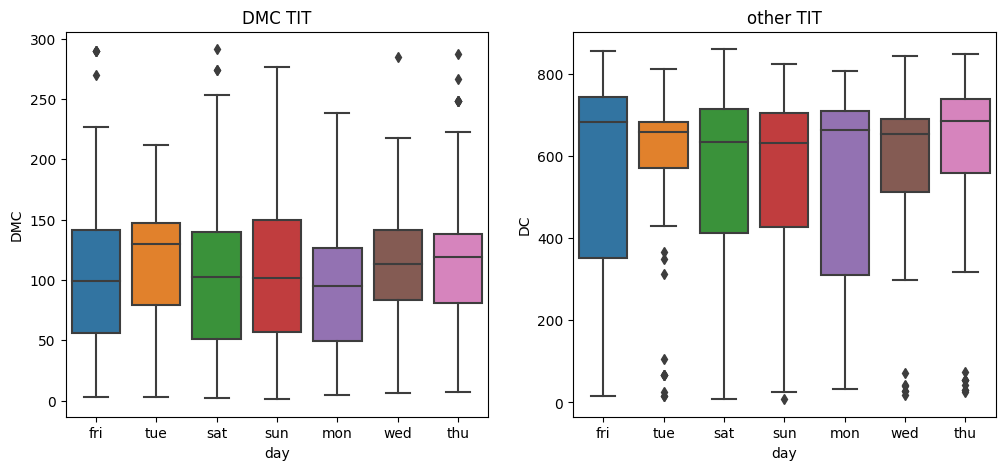

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=df['day'], y=df['DMC'], ax=axes[0])
sns.boxplot(x=df['day'], y=df['DC'], ax=axes[1])
axes[0].set_title('DMC TIT')
axes[1].set_title('other TIT')

### Boxplot with Data Points
We could even overlay a swarmplot onto the boxplot in order to see the distribution and samples of the points comprising that distribution, with a bit more detail.
In order to do this, we just create a single figure object and then create two different plots. The stripplot() will be overlaid over the boxplot(), since they're on the same axes/figure:

Text(0, 0.5, 'Values')

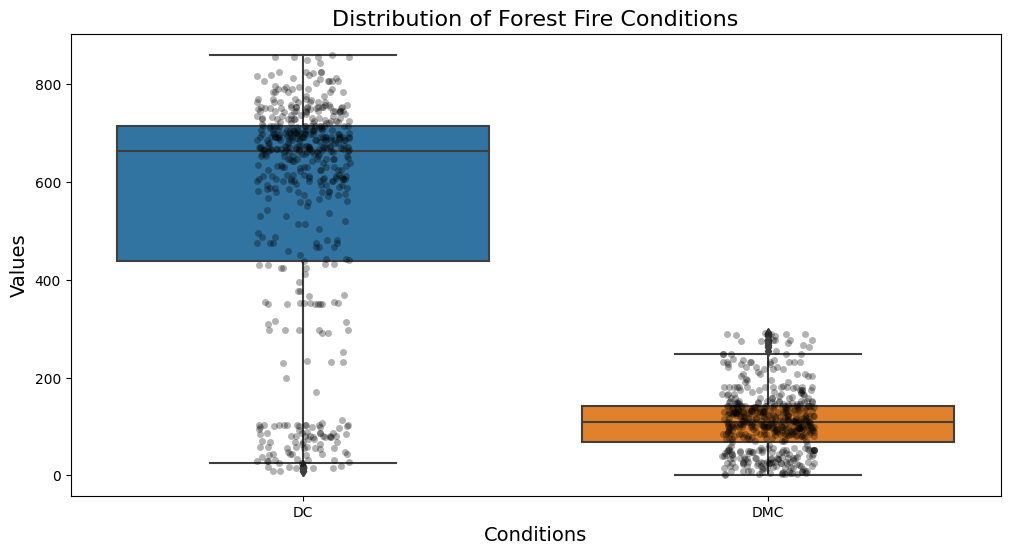

In [49]:
fig, axe = plt.subplots(figsize=(12, 6))

# sns.boxplot(x="variable", y="value", data=pd.melt(df1), order=["DC", "DMC", "FFMC", "ISI"], ax=axe)
# sns.stripplot(x="variable", y="value", data=pd.melt(df1), marker="o", alpha=0.3,
#               color="black", order=["DC", "DMC", "FFMC", "ISI"], ax=axe)

sns.boxplot(x="variable", y="value", data=pd.melt(df1), order=["DC", "DMC"], ax=axe)
sns.stripplot(x="variable", y="value", data=pd.melt(df1), marker="o", alpha=0.3,
              color="black", order=["DC", "DMC"], ax=axe)
axe.set_title("Distribution of Forest Fire Conditions", fontsize=16)
axe.set_xlabel("Conditions", fontsize=14)
axe.set_ylabel("Values", fontsize=14)